In [1]:
import pandas as pd
from pathlib import Path

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/test.csv.zip
/kaggle/input/sample_submission.csv
/kaggle/input/train.csv
/kaggle/input/test.csv
/kaggle/input/sample_submission.csv.zip
/kaggle/input/description.md
/kaggle/input/train.csv.zip
/kaggle/input/train.zip
/kaggle/input/spooky-author-identification/test.csv.zip
/kaggle/input/spooky-author-identification/sample_submission.csv
/kaggle/input/spooky-author-identification/train.csv
/kaggle/input/spooky-author-identification/test.csv
/kaggle/input/spooky-author-identification/sample_submission.csv.zip
/kaggle/input/spooky-author-identification/description.md
/kaggle/input/spooky-author-identification/train.csv.zip
/kaggle/input/spooky-author-identification/train.zip


In [3]:
!unzip '/kaggle/input/spooky-author-identification/train.zip'


Archive:  /kaggle/input/spooky-author-identification/train.zip
  inflating: train.csv               
  inflating: sample_submission.csv   


In [4]:
!unzip '/kaggle/input/spooky-author-identification/test.zip'
!unzip '/kaggle/input/spooky-author-identification/sample_submission.zip'


unzip:  cannot find or open /kaggle/input/spooky-author-identification/test.zip, /kaggle/input/spooky-author-identification/test.zip.zip or /kaggle/input/spooky-author-identification/test.zip.ZIP.
unzip:  cannot find or open /kaggle/input/spooky-author-identification/sample_submission.zip, /kaggle/input/spooky-author-identification/sample_submission.zip.zip or /kaggle/input/spooky-author-identification/sample_submission.zip.ZIP.


In [5]:
data = pd.read_csv('train.csv')
data.head()


,id,text,author
0,id06121,So I did not abandon the search until I had be...,EAP
1,id01074,He had promised to spend some hours with me on...,MWS
2,id12145,In the end he give him a funny kind o' thingum...,HPL
3,id18286,What other construction could I possibly put u...,EAP
4,id11118,"I had heard the noise, however faint, and my s...",EAP


In [6]:
test = pd.read_csv('test.csv')
test.head()


FileNotFoundError: [Errno 2] No such file or directory: 'test.csv'

In [7]:
sample = pd.read_csv('sample_submission.csv')
sample.head()


,id,EAP,HPL,MWS
0,id27251,0.403494,0.287808,0.308698
1,id09612,0.403494,0.287808,0.308698
2,id11943,0.403494,0.287808,0.308698
3,id19526,0.403494,0.287808,0.308698
4,id12931,0.403494,0.287808,0.308698


In [8]:
data.shape


(17621, 3)

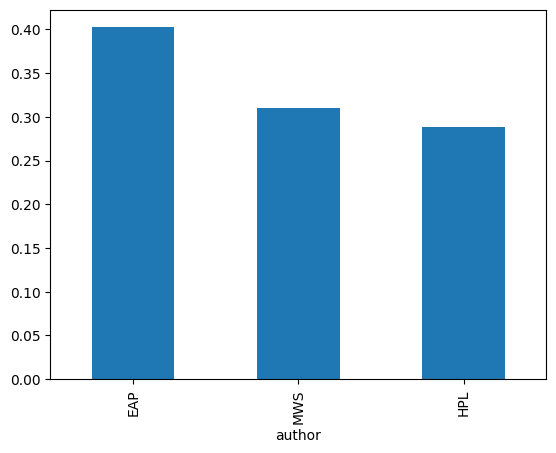

In [9]:
import matplotlib.pyplot as plt

data['author'].value_counts(normalize=True).plot(kind='bar')
plt.show()


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# 데이터 로드 및 준비
def load_data(file_path):
    df = pd.read_csv(file_path)
    texts = df['text'].tolist()
    authors = df['author'].tolist()
    return texts, authors

def load_test_data(file_path):
    df = pd.read_csv(file_path)
    texts = df['text'].tolist()
    ids = df['id'].tolist()
    return texts, ids

file_path = "train.csv"  # 학습 데이터 경로
test_file_path = "test.csv"  # 테스트 데이터 경로

texts, authors = load_data(file_path)
test_texts, test_ids = load_test_data(test_file_path)

# 텍스트 벡터화
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(texts)

# 레이블 인코딩
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(authors)

# 데이터셋 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 나이브 베이즈 모델 정의 및 학습
model = MultinomialNB()
model.fit(X_train, y_train)

# 검증 데이터 성능 평가
y_val_pred = model.predict(X_val)
print("Validation Classification Report:\n")
print(classification_report(y_val, y_val_pred, target_names=label_encoder.classes_))

# 테스트 데이터에 대한 예측
test_X = vectorizer.transform(test_texts)
test_predictions = model.predict_proba(test_X)

# 결과 저장
result_df = pd.DataFrame(test_predictions, columns=label_encoder.classes_)
result_df['id'] = test_ids
result_df
result_df.to_csv("test_predictions.csv", index=False)


FileNotFoundError: [Errno 2] No such file or directory: 'test.csv'